# Evaluation Notebook 

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

## Standart Parameter 
If not other stated in the plots these are the used hyperparameter

batchsize = 32
embedding_dim = 128,
context_length = 32,

standardLinear = LinearLanguageModel with dropout 
dropout = 0.2


**Preprocessing Methods**
preprocessingmethods:

*Replace*: Every non typical caracter for the language will be replaced with the empty string 

*remove*: Lines with very untypical caracters will be deleted 

*both*: both of the methods will be used (first remove then replace)

standartPreprocessing Method *Replace*


In [2]:
from src.evHelper import load_everything
from src.train import evaluate_attention
from src.plot import plot_two

import torch
#Path to the spanish training data for attention Model
span_path_attent= "model/attent_data" 
#Path to the spanish training data of the linear model
span_path_train_lin = "model/train_data"
#Path to the persian training data 
pers_path_train = "model/train_data_pers"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

path = pers_path_train
name = "pers_attention_standard_dropout_batchsize16_ep5_eval10000"
#reads all the stored data 
# losses :: a list of all the average loss over the epochs (if there was only one epoch trained 
# This list will only consist of one entry
# step_losses :: list of all losses step wise 
# perplexities :: perplexities epoch wise 
# all_perplex :: During training in a single epoch there where multiple evaluation points these are all the 
# mesured perplexities over all epochs see also the code below 
# model :: the final state of the model after training. 
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)


Using device: cuda


In [ ]:
from src.evHelper import standart_deviation
def add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv = False):
    print("Processing")
    losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
    x_labels, y_labels = prep_func_1(step_losses,epoch)
    first_graphs.append((label,x_labels,y_labels))

    if calculate_stdv:
        result = standart_deviation(step_losses,window)
    else:
        result = None
    x_labels, y_labels = prep_func_2(all_perplex,epoch)
    second_graphs.append((label,x_labels,y_labels))
    return result

## Deliverable 3: Simple Neural Language Model

### Spanish 

##### Create Plot

In [15]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
window = 200 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []

path = span_path_train_lin
name = "LinearWithRelu_ep4_batch32_evaluateEvery3000_ep5"
label = "Linear Model With extra ReLu"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))

name = "standardLinear_ep4_batch32"
label = "Linear Model Base Dropout 0.2"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))

#standardLinear_ep4_batch8
name = "standardLinear_ep4_batch8"
label = "Linear Model Batch 8"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))


#standardLinear_ep4_batch8
name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
label = "Linear Model No Dropout"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))

print("Average std dev: ",np.mean(std_dev))

FileNotFoundError: [Errno 2] No such file or directory: 'model/train_data_pers/LinearWithRelu_ep4_batch32_evaluateEvery3000_ep5/losses.json'

##### Make Plot

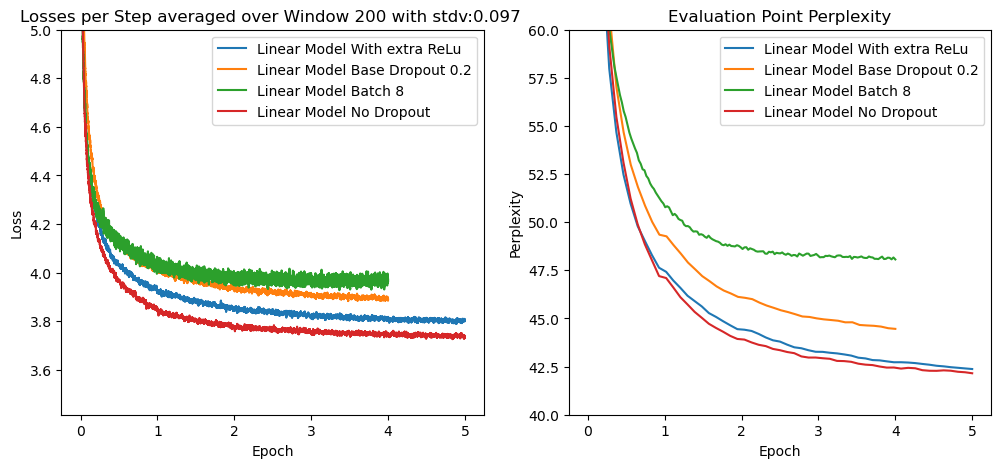

In [8]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 200 with stdv:0.097 ",second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=5,second_y_lim=(40,60))




### Persian 

##### Create Plot

In [17]:
from src.plot import plot_multiple, get_prep_func
# TodoAnker1 
import numpy as np
window = 300 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

path = pers_path_train
name = "pers_standardLinear_ep4"
label = "Linear Model With Dropout 0.2"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinear_ep4_batchsize128_evaluateevery10000"
label = "Linear Model With Dropout 0.2 and batchsize 128"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

#standardLinear_ep4_batch8
name = "pers_standardLinear_ep4_batchsize16_evaluateevery20000"
label = "Linear Model With Dropout 0.2 and batchsize 16"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))



name = "pers_standardLinear_no_dopout_notRelu_ep5_batchsize32_evaluate_every10000"
label = "Linear Model No Relu No Dropout "
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

#pers_LinearWithRelu_ep4_batchsize32_evaluateevery10000
name = "pers_LinearWithRelu_ep4_batchsize32_evaluateevery10000"
label = "Relu Model ,Dropout 0.2 "
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

#standardLinear_ep4_batch8
#name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
#label = "Linear Model No Dropout"
#epoch = 5
#std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))
avg_std_dev = round(np.mean(std_dev),3)
print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.0949048483665291


##### Plot the plot

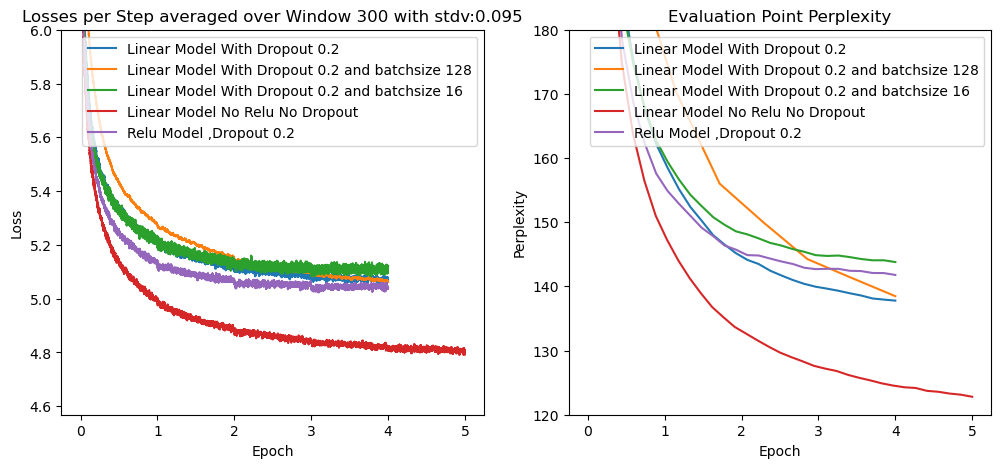

In [19]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 300 with stdv:"+str(avg_std_dev),second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=6.0,second_y_lim=(120,180))



## Deliverable 4 

### Spanish

#### Create Preprocessing

In [37]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
window = 200 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

path = span_path_train_lin # pers_path_train
name = "standardLinear_ep4_batch32_removeMethodBoth"
label = "Linear Model No Relu With Dropout 0.2 Preprocessing Both"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "standardLinear_ep4_batch32_removeMethodPrep"
label ="Linear Model No Relu With Dropout 0.2 Preprocessing Remove"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


name = "standardLinear_ep4_batch32"
label = "Linear Model No Relu With Dropout 0.2 Preprocessing Standart(Replace)"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))





#standardLinear_ep4_batch8
#name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
#label = "Linear Model No Dropout"
#epoch = 5
#std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))

print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.07967180392452604


#### Make Preprocessing

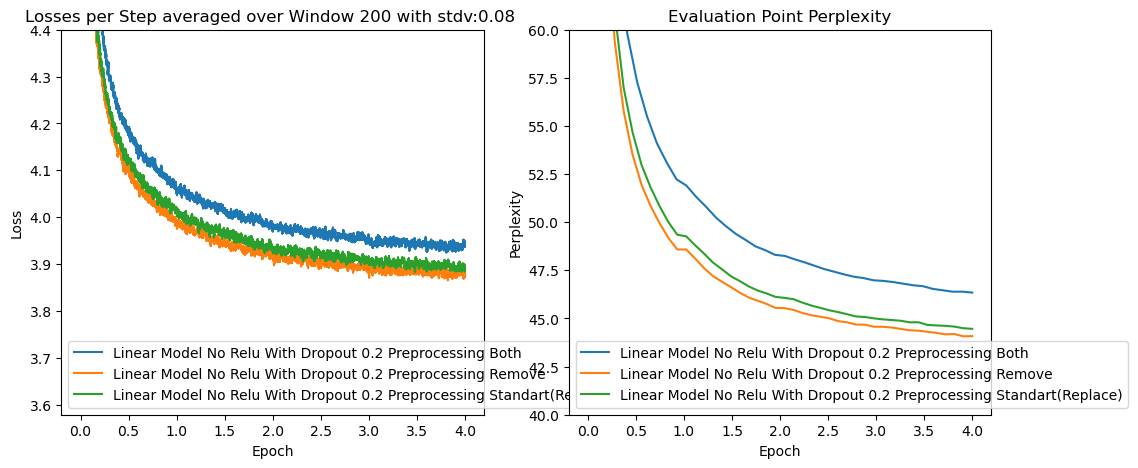

In [41]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 200 with stdv:0.08 ",second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=4.4,second_y_lim=(40,60))



#### Create BatchSize

In [58]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
#TOdo anker6
window = 200 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

path = span_path_train_lin #pers_path_train


name = "standardLinear_ep4_batch16"
label = "Linear Model No Relu With Dropout 0.2  Batch Size 16"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "standardLinear_ep4_batch32"
label ="Linear Model No Relu With Dropout 0.2  Batch Size 32"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "standardLinear_ep4_batch64"
label = "Linear Model No Relu With Dropout 0.2  Batch Size 64"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

## Transformer 
path = span_path_attent#span_path_train_lin #pers_path_train

name = "basic_att_batchsize16_ep4"
label = "Attention Model Batchsize 16"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


name = "basic_att_batchsize64_ep4"
label = "Attention Model Batchsize 64"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


#standardLinear_ep4_batch8
#name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
#label = "Linear Model No Dropout"
#epoch = 5
#std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))
avg_std_dev = round(np.mean(std_dev),3)
print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.09468144694948119


#### Make Batch size Spanish

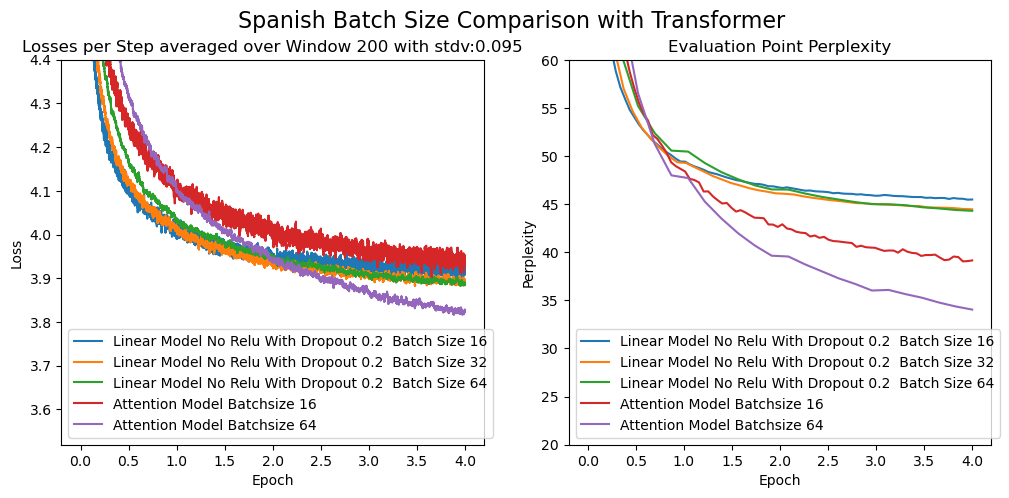

In [63]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 200 with stdv:"+str(avg_std_dev),second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=4.4,second_y_lim=(20,60),main_label="Spanish Batch Size Comparison with Transformer")



#### Create Extra Relu

In [67]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
#TOdo anker5
window = 300 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

path = span_path_train_lin #pers_path_train


name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
label = "Linear Model No Relu No Dropout"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))




name = "standardLinear_ep4_batch32"
label = "Linear Model No Relu With Dropout 0.2"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "LinearWithRelu_ep4_batch32_evaluateEvery3000_ep5"
label ="Relu Model With Dropout 0.2  Batch Size 32"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


name = "spanish_LinearRelu_dopout_2Relu_ep5_batchsize32_evaluate_every3000"
label = "Relu Model 2xRelu Layer Dropout"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


#standardLinear_ep4_batch8
#name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
#label = "Linear Model No Dropout"
#epoch = 5
#std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))
avg_std_dev = round(np.mean(std_dev),3)
print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.07565860517978214


#### Make Extra Relu

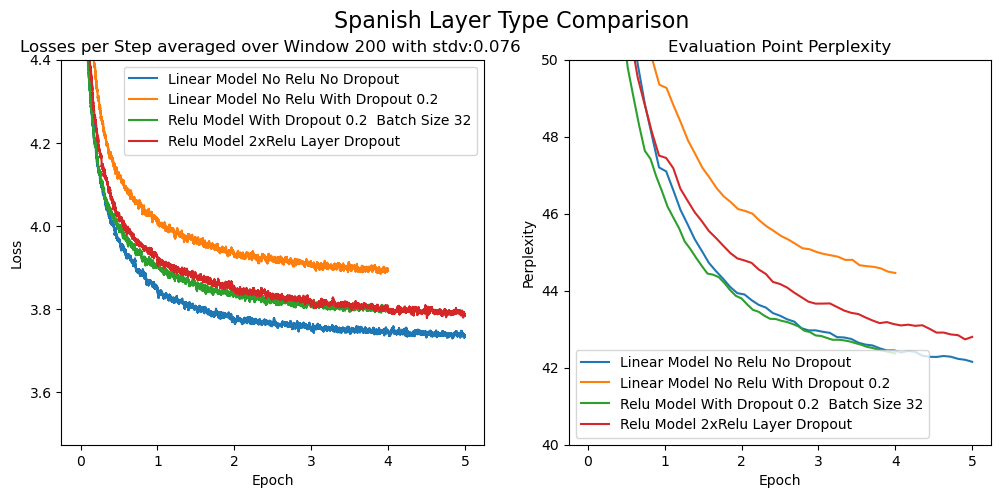

In [70]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 200 with stdv:0.076 ",second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=4.4,second_y_lim=(40,50),main_label="Spanish Layer Type Comparison")



### **Persian**

#### Create Preprcessing

In [14]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
#TOdo anker 2
window = 300 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

path = pers_path_train
name = "pers_standardLinearNotRelu_ep4_evaluate10000_preprocessingBoth"
label = "Linear Model No Relu With Dropout 0.2 Preprocessing Both"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinearNotRelu_ep4_evaluate10000_preprocessingRemove"
label ="Linear Model No Relu With Dropout 0.2 Preprocessing Remove"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinear_ep4"
label = "Linear Model No Relu With Dropout Preprocessing Standard (replace) "
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


#standardLinear_ep4_batch8
#name = "Simple_Linear_no_dropout_ep4_batch32_evaluateEvery3000_ep5"
#label = "Linear Model No Dropout"
#epoch = 5
#std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window))
avg_std_dev = round(np.mean(std_dev),3)
print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.0990345885019394


#### Make Preprcessing

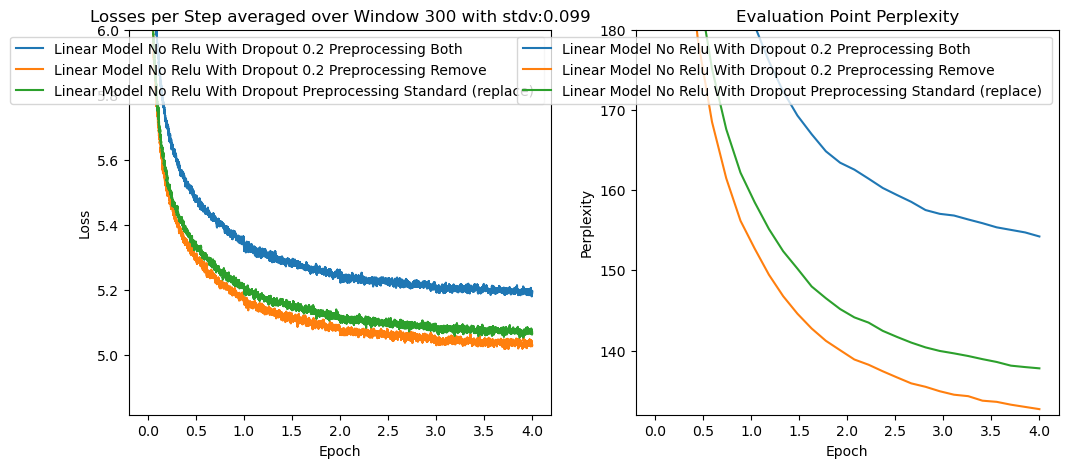

In [15]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 300 with stdv:"+str(avg_std_dev),second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=6.0,second_y_lim=(132,180))



#### Create Relu

In [38]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
#TOdo anker 2
window = 300 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True

#pers_LinearRelu_dopout_2Relu_ep5_batchsize32_evaluate_every10000
name = "pers_LinearRelu_dopout_2Relu_ep5_batchsize32_evaluate_every10000"
label = "Relu Model Dropout 2xRelu "
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))



path = pers_path_train
name = "pers_LinearWithRelu_ep4_batchsize32_evaluateevery10000"
label = "Relu Model With Dropout 0.2"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinear_ep4"
label ="Linear Model No Relu With Dropout 0.2"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))



#pers_standardLinear_no_dopout_notRelu_ep5_batchsize32_evaluate_every10000
name = "pers_standardLinear_no_dopout_notRelu_ep5_batchsize32_evaluate_every10000"
label = "Linear Model No Relu No Dropout "
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))





avg_std_dev = round(np.mean(std_dev),3)
print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.09437616623643738


#### Make Relu

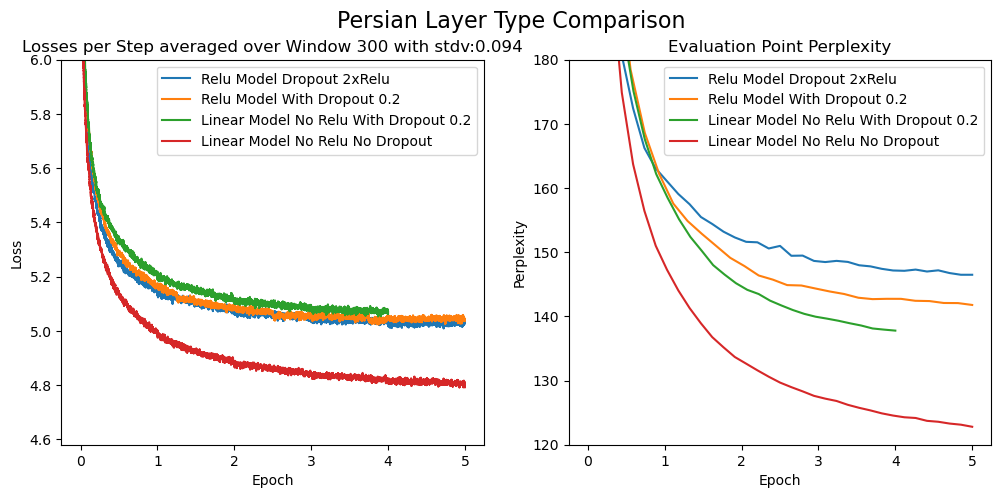

In [40]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 300 with stdv:"+str(avg_std_dev),second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=6.0,second_y_lim=(120,180),main_label="Persian Layer Type Comparison")



#### Create Batch Size

In [64]:
from src.plot import plot_multiple, get_prep_func
import numpy as np
#Anker 7
window = 300 
prep_func_1  = get_prep_func(0,window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
std_dev = []
calculate_stdv = True
path = pers_path_train


name = "pers_standardLinear_ep4_batchsize16_evaluateevery20000"
label = "Linear Model No Relu With Dropout 0.2 Batch Size 16"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinear_ep4"
label = "Linear Model No Relu With Dropout 0.2 Batch Size 32"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

name = "pers_standardLinear_ep4_batchsize64"
label = "Linear Model No Relu With Dropout 0.2 Batch Size 64"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


name = "pers_standardLinear_ep4_batchsize128_evaluateevery10000"
label ="Linear Model No Relu With Dropout 0.2 Batch Size 128"
epoch = 4
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))

# Transformer

name = "pers_attention_standard_dropout_batchsize16_ep5_eval10000"
label = "Attention Model Batchsize 16"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


#pers_attention_standard_dropout_ep10_eval10000
name = "pers_attention_standard_dropout_ep10_eval10000"
label = "Attention Model Batchsize 32"
epoch = 10
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))


name = "pers_attention_standard_dropout_batchsize64_ep5_eval10000"
label = "Attention Model Batchsize 64"
epoch = 5
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,calculate_stdv))




print("Average std dev: ",np.mean(std_dev))

Average std dev:  0.10503319544413235


#### Make Batch Size

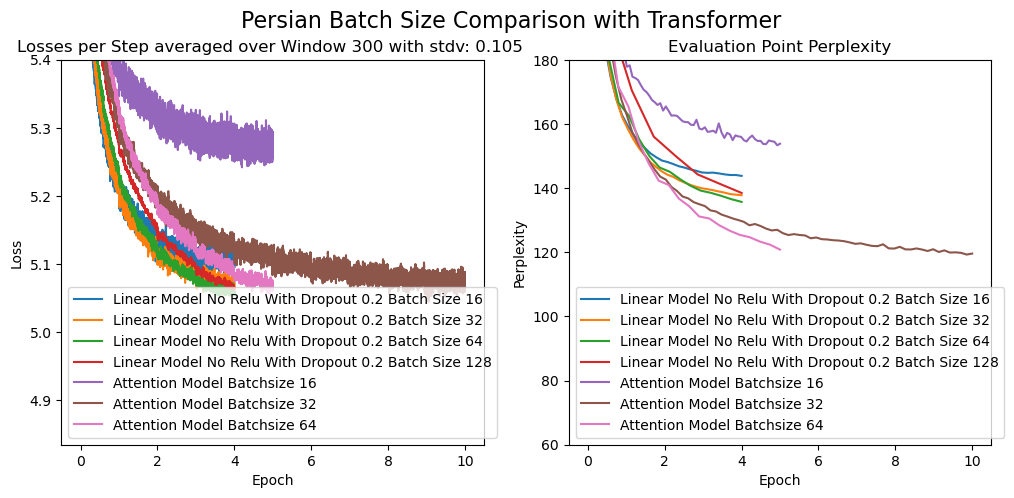

In [66]:
from src.plot import plot_multiple, get_prep_func
plot_multiple(first_graphs,"Losses per Step averaged over Window 300 with stdv: 0.105 ",second_graphs,"Evaluation Point Perplexity",
              axLabel1 = None, axLabel2 = None,save = True,first_y_lim=5.4,second_y_lim=(60,180), main_label="Persian Batch Size Comparison with Transformer")



### Generate Examples

In [20]:
# The loaded Model can also be used do generate examples 
from src.model import generate_text
from transformers import  AutoTokenizer  #pipeline, GPT2LMHeadModel

# For persian the gpt2-persian is used 
tokenizer = AutoTokenizer.from_pretrained('bolbolzaban/gpt2-persian')

start_text = " من در راه"
for x in range(20):
    # Note that there is the Parameter is_attention which schould be true if the model is an AttentionModel 
    # and false otherwise
    generated_text = generate_text(model, tokenizer, start_text, device=device, context_length=20, is_attention = True)
    print(generated_text)

2024-12-15 17:07:43.889022: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-15 17:07:43.927555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[CLS] من در راه[SEP] در بیمارستانهای علمی است محمدسعیدویکعظمی و خبرنگار رشت مسئول ارتباطات
[CLS] من در راه[SEP] تحقیقات اتهامی تبرئه نشده مطرح شده است و ابراز کرد. این بار یارانه یک
[CLS] من در راه[SEP] نبود از طرفی همچنان حضانت که نزدیکی قبرس هم خدمات نظارتی را وضع کرده 
[CLS] من در راه[SEP] احساس خاصی برای بیماران ما به کشورهای اسکاندیناوی گریه کنیم. بپرسیم بازار مثل قوانین
[CLS] من در راه[SEP] نیست. به قبل ثابت را در حال بافت طلای تر شده از۶
[CLS] من در راه[SEP] دقیقی است به دلیل تقدیس کمتر از طریق احتمال دارد که چگونهمان چنین خبری
[CLS] من در راه[SEP] برسیم. درست نیست و تاکنون بیش از۵ درصد کلی متقاضیان پایدار است؟
[CLS] من در راه[SEP]های جهان پهناور آسیامون کرد. آن از شب درگذشت. حالا خسته و
[CLS] من در راه[SEP] پاسخ کار دارم ادامه داد. او برای روی صحنه هم آماده باشکارهایشان
[CLS] من در راه[SEP] ماجرای در جمع سلام و چنان این جمله کتابی از معانی را خواند را
[CLS] من در راه[SEP]گه پلاستیکی وابستگی متافیزیکی داشته باشد و آخرین مالکیتمّا تلاش میکنم
[CLS] من در راه[SEP] علی قاسمی و مدرس 

### Download Code 

In [9]:
!tar -c -f newArchivEverything.zip .